In [8]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x=2*np.random.random(size=100)
y=x*3.+4.+np.random.normal(size=100)

In [9]:
X=x.reshape(-1,1)

In [10]:
X.shape

(100, 1)

In [11]:
y.shape

(100,)

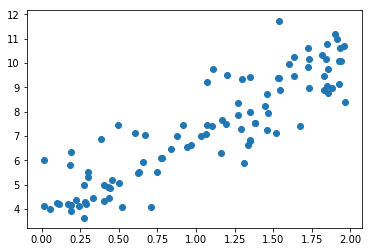

In [7]:
plt.scatter(X,y)

# 使用梯度下降法训练回归模型

In [14]:
def J(theta,X_b,y):
    try:
        return np.sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

In [15]:
def dJ(theta,X_b,y):
    res=np.empty(len(theta))
    res[0]=np.sum(X_b.dot(theta)-y)
    for i in range(1,len(theta)):
        res[i]=(X_b.dot(theta)-y).dot(X_b[:,i])
    return res*2/len(X_b)

In [17]:
def gradient_descent(X_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-8):
    theta=initial_theta
    i_iter=0
    while i_iter<n_iters:
        gradient=dJ(theta,X_b,y)
        last_theta=theta
        theta=theta-eta*gradient
        
        if(abs(J(theta,X_b,y)-J(last_theta,X_b,y))<epsilon):
            break
        i_iter+=1
    return theta

In [21]:
X_b=np.hstack([np.ones((len(x),1)),x.reshape(-1,1)])
initial_theta=np.zeros(X_b.shape[1])
eta=0.01
theta=gradient_descent(X_b,y,initial_theta,eta)

In [22]:
theta

array([4.02145786, 3.00706277])

# 封装我们的线性回归算法

In [23]:
from playML.LinearRegression import LinearRegression

In [24]:
lin_reg=LinearRegression()

In [25]:
lin_reg.fit_gd(X,y)

LinearRegression()

In [26]:
lin_reg.coef_

array([3.00706277])

In [27]:
lin_reg.interception_

4.021457858204859

# 梯度下降的向量化

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
boston=datasets.load_boston()

In [3]:
X=boston.data

In [4]:
y=boston.target

In [5]:
X=X[y<50.0]
y=y[y<50.0]

In [6]:
from playML.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,seed=666)

In [28]:
from playML.LinearRegression import LinearRegression

In [29]:
lin_reg1=LinearRegression()
%time lin_reg1.fit_normal(X_train,y_train)
lin_reg1.score(X_test,y_test)

CPU times: user 797 µs, sys: 330 µs, total: 1.13 ms
Wall time: 704 µs


0.8129794056212832

In [30]:
lin_reg2=LinearRegression()

In [31]:
%time lin_reg2.fit_gd(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/gongzhe/Documents/python3机器学习入门/playML/LinearRegression.py:22: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
/Users/gongzhe/Documents/python3机器学习入门/playML/LinearRegression.py:43: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):


CPU times: user 1.36 s, sys: 14.6 ms, total: 1.38 s
Wall time: 711 ms


LinearRegression()

In [32]:
lin_reg2.score(X_test,y_test)

nan

In [33]:
lin_reg2.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [34]:
X_train[:10,:]

array([[1.42362e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.34300e+00, 1.00000e+02, 1.57410e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.03200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.70000e-01,
        5.36200e+00, 9.62000e+01, 2.10360e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.80790e+02, 1.01900e+01],
       [1.04690e-01, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
        7.26700e+00, 4.90000e+01, 4.78720e+00, 4.00000e+00, 2.54000e+02,
        1.76000e+01, 3.89250e+02, 6.05000e+00],
       [1.15172e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.70100e+00, 9.50000e+01, 3.78720e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.58770e+02, 1.83500e+01],
       [6.58800e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        7.76500e+00, 8.33000e+01, 2.74100e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.95560e+02, 7.56000e+00],
       [2.49800e-02, 0.00000e+

In [35]:
lin_reg2.fit_gd(X_train,y_train,eta=0.000001)

LinearRegression()

In [36]:
lin_reg2.coef_

array([-0.10245704,  0.11535876, -0.06248791,  0.00207516,  0.00447152,
        0.11954208,  0.04684195,  0.03460927, -0.00452122,  0.00324507,
        0.1271939 ,  0.04484862, -0.22542441])

In [37]:
lin_reg2.score(X_test,y_test)

0.27586818724477236

In [38]:
%time lin_reg2.fit_gd(X_train,y_train,eta=0.000001,n_iters=1e6)

CPU times: user 1min 57s, sys: 624 ms, total: 1min 58s
Wall time: 1min


LinearRegression()

In [39]:
lin_reg2.score(X_test,y_test)

0.7542932581943915

#  使用梯度下降前进行数据归一化

In [40]:
from sklearn.preprocessing import StandardScaler
standardScaler=StandardScaler()

In [41]:
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_train_standard=standardScaler.transform(X_train)

In [43]:
lin_reg3=LinearRegression()

In [44]:
lin_reg3.fit_gd(X_train_standard,y_train)

LinearRegression()

In [45]:
X_test_standard=standardScaler.transform(X_test)
lin_reg3.score(X_test_standard,y_test)

0.8129873310487505

# 梯度下降法的优势

In [46]:
m=1000
n=5000

In [48]:
big_X=np.random.normal(size=(m,n))
true_theta=np.random.uniform(0.0,100.0,size=n+1)
big_y=big_X.dot(true_theta[1:])+true_theta[0]+np.random.normal(0.,10.,size=m)

In [49]:
big_reg1=LinearRegression()
%time big_reg1.fit_normal(big_X,big_y)

CPU times: user 15.3 s, sys: 686 ms, total: 16 s
Wall time: 8.21 s


LinearRegression()

In [50]:
big_reg2=LinearRegression()
%time big_reg1.fit_gd(big_X,big_y)

CPU times: user 9.59 s, sys: 86.3 ms, total: 9.67 s
Wall time: 5.06 s


LinearRegression()